In [84]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [85]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [86]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [87]:
data = tf.keras.utils.image_dataset_from_directory('data')

preprocessed_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=data_dir, target_size=(224,224), classes=['happy', 'sad'], batch_size=32)

Found 305 files belonging to 2 classes.
Found 305 images belonging to 2 classes.


In [88]:
data_iterator = data.as_numpy_iterator()

In [89]:
batch = data_iterator.next()

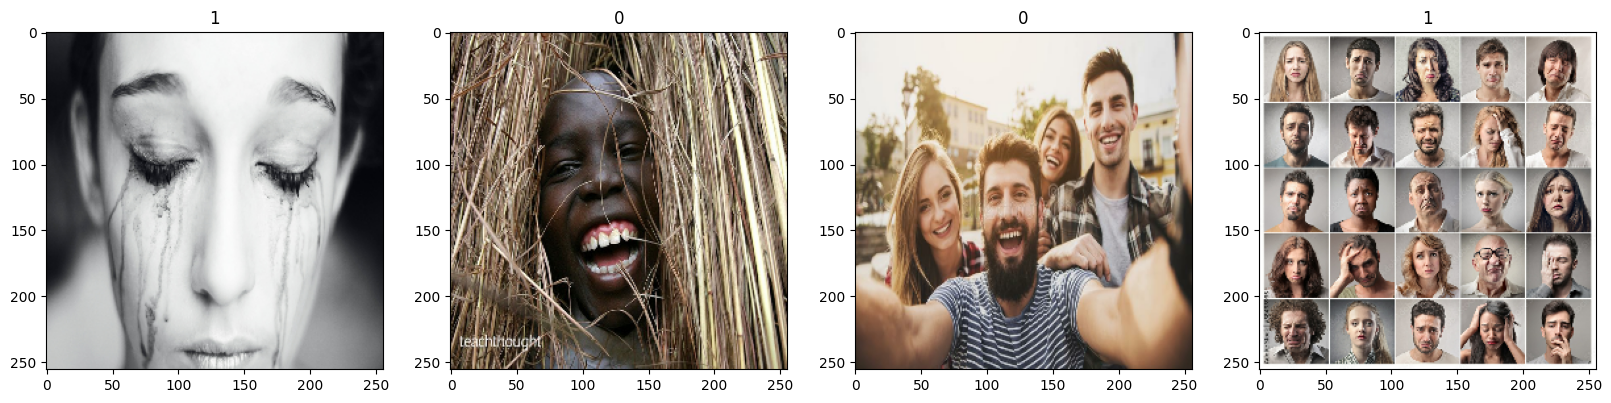

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [91]:
data = data.map(lambda x,y: (x/255, y))

In [92]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [93]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [94]:
train_size

7

In [95]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [98]:
model = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

In [100]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [101]:
logdir='logs'

In [102]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [103]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 27s 3s/step - loss: 1.2185 - accuracy: 0.5312 - val_loss: 0.6192 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 19s 2s/step - loss: 0.6307 - accuracy: 0.5045 - val_loss: 0.6024 - val_accuracy: 0.5156
Epoch 3/20
7/7 [==============================] - 24s 3s/step - loss: 0.6226 - accuracy: 0.5625 - val_loss: 0.6062 - val_accuracy: 0.7344
Epoch 4/20
7/7 [==============================] - 24s 3s/step - loss: 0.5622 - accuracy: 0.7500 - val_loss: 0.6597 - val_accuracy: 0.7031
Epoch 5/20
7/7 [==============================] - 25s 3s/step - loss: 0.5748 - accuracy: 0.7411 - val_loss: 0.5071 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 21s 2s/step - loss: 0.4466 - accuracy: 0.8661 - val_loss: 0.4024 - val_accuracy: 0.8125
Epoch 7/20
7/7 [==============================] - 23s 3s/step - loss: 0.3667 - accuracy: 0.8616 - val_loss: 0.2713 - val_accuracy: 0.9219
Epoch 8/20
7/7 [==================